# 1. Will there be any strong connection between property distribution and traffic distribution

# 2. Newly built properties and Car&Texis activities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

In [2]:
 #HM Land Registry Price Paid Data    https://www.gov.uk/guidance/about-the-price-paid-data

In [3]:
df = pd.read_csv("../1210due/pp-2016.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{31FB4C17-ADD8-57B9-E050-A8C063053436},440000,2016-03-29 00:00,IG3 9ER,T,N,F,83,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A
1,{31FB4C17-ADD9-57B9-E050-A8C063053436},995000,2016-03-30 00:00,HA6 2RR,D,N,F,2,NaN,CHELWOOD CLOSE,NaN,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
2,{31FB4C17-ADDB-57B9-E050-A8C063053436},355000,2016-03-23 00:00,TW14 9NR,D,N,F,46,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,B,A
3,{31FB4C17-ADDC-57B9-E050-A8C063053436},429000,2016-03-31 00:00,TW3 4LF,S,N,F,120,NaN,SUTTON LANE,NaN,HOUNSLOW,HOUNSLOW,GREATER LONDON,A,A
4,{31FB4C17-ADDD-57B9-E050-A8C063053436},4500000,2016-03-31 00:00,W11 3RS,F,N,L,50,FLAT 3,HOLLAND PARK,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [4]:
#Add labels to our csv columns

In [5]:
df.columns = ['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
            'paon', 'saon', 'street', 'locality', 'city', 'district', 'county', 'ppd_cat', 'record_status']
df.head()

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{31FB4C17-ADD8-57B9-E050-A8C063053436},440000,2016-03-29 00:00,IG3 9ER,T,N,F,83,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A
1,{31FB4C17-ADD9-57B9-E050-A8C063053436},995000,2016-03-30 00:00,HA6 2RR,D,N,F,2,NaN,CHELWOOD CLOSE,NaN,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
2,{31FB4C17-ADDB-57B9-E050-A8C063053436},355000,2016-03-23 00:00,TW14 9NR,D,N,F,46,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,B,A
3,{31FB4C17-ADDC-57B9-E050-A8C063053436},429000,2016-03-31 00:00,TW3 4LF,S,N,F,120,NaN,SUTTON LANE,NaN,HOUNSLOW,HOUNSLOW,GREATER LONDON,A,A
4,{31FB4C17-ADDD-57B9-E050-A8C063053436},4500000,2016-03-31 00:00,W11 3RS,F,N,L,50,FLAT 3,HOLLAND PARK,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [6]:
len(df)

1037880

In [7]:
#Seems we don't need ID column

In [8]:
id_col = df.pop('id')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,440000,2016-03-29 00:00,IG3 9ER,T,N,F,83,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A
1,995000,2016-03-30 00:00,HA6 2RR,D,N,F,2,NaN,CHELWOOD CLOSE,NaN,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
2,355000,2016-03-23 00:00,TW14 9NR,D,N,F,46,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,B,A
3,429000,2016-03-31 00:00,TW3 4LF,S,N,F,120,NaN,SUTTON LANE,NaN,HOUNSLOW,HOUNSLOW,GREATER LONDON,A,A
4,4500000,2016-03-31 00:00,W11 3RS,F,N,L,50,FLAT 3,HOLLAND PARK,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [9]:
df.describe()

,price
count,1.037880e+06
mean,3.116281e+05
std,1.112241e+06
min,1.000000e+00
25%,1.370000e+05
50%,2.150000e+05
75%,3.350000e+05
max,3.700000e+08


In [10]:
#Discover property price distribution 

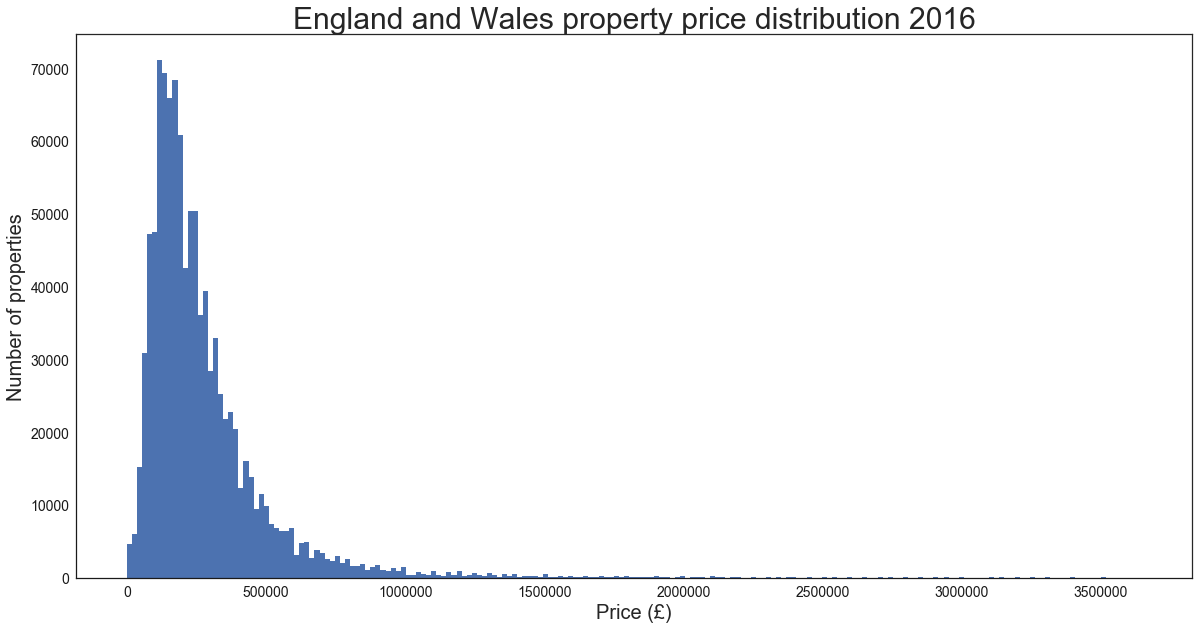

In [11]:
chart1 = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England and Wales property price distribution 2016', fontsize=30)
plt.xlabel('Price (£)', fontsize=20)
plt.ylabel('Number of properties', fontsize=20)

plt.hist(chart1.price, bins=200);

In [12]:
#Convert a binary field to 1 and 0 (from Y or N) for later use

In [13]:
def convert_binary(x, val1, val2):
    # True value
    if x == 'Y':
        return 1
    #False value
    elif x == 'N':
        return 0
    else:
        return np.nan
    
df.new = df.new.apply(convert_binary, args=('Y', 'N'))
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,440000,2016-03-29 00:00,IG3 9ER,T,0,F,83,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A
1,995000,2016-03-30 00:00,HA6 2RR,D,0,F,2,NaN,CHELWOOD CLOSE,NaN,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
2,355000,2016-03-23 00:00,TW14 9NR,D,0,F,46,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,B,A
3,429000,2016-03-31 00:00,TW3 4LF,S,0,F,120,NaN,SUTTON LANE,NaN,HOUNSLOW,HOUNSLOW,GREATER LONDON,A,A
4,4500000,2016-03-31 00:00,W11 3RS,F,0,L,50,FLAT 3,HOLLAND PARK,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [14]:
# Import traffic data. Source:https://www.gov.uk/government/organisations/department-for-transport/about/statistics

In [15]:
df2 = pd.read_csv('../1210due/ukTrafficAADF.csv')

In [16]:
df2.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [17]:
df2.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
count,275385.000000,275385.000000,275385.000000,2.753850e+05,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,...,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000
mean,2007.967907,47277.490437,425675.250780,3.561826e+05,2.757116,1.712899,123.314654,222.099297,16813.332923,248.662175,...,489.379193,83.551450,88.924513,74.249433,247.927389,271.747354,1255.774163,21152.693542,53.092936,-1.654634
std,4.862875,27004.889605,98687.570954,1.869923e+05,3.815569,2.371086,421.440798,420.874069,16618.266842,374.650774,...,683.713666,121.773472,142.005359,183.767833,752.311296,835.966781,2446.175298,21536.689989,1.681459,1.478250
min,2000.000000,60.000000,69987.000000,7.625000e+04,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.583853,-7.442680
25%,2004.000000,26218.000000,352970.000000,1.921200e+05,0.600000,0.370000,5.000000,58.000000,7125.000000,60.000000,...,148.000000,24.000000,15.000000,7.000000,9.000000,10.000000,252.000000,8941.000000,51.614977,-2.711540
50%,2008.000000,47252.000000,430000.000000,3.240000e+05,1.400000,0.870000,26.000000,113.000000,12255.000000,127.000000,...,273.000000,46.000000,41.000000,20.000000,34.000000,37.000000,489.000000,15143.000000,52.807705,-1.549475
75%,2012.000000,74392.000000,510600.000000,4.296000e+05,3.200000,1.990000,83.000000,214.000000,19951.000000,280.000000,...,517.000000,91.000000,100.000000,56.000000,125.000000,137.000000,1041.000000,24660.000000,53.760638,-0.389834
max,2016.000000,99967.000000,655040.000000,1.205400e+06,55.500000,34.490000,18629.000000,9815.000000,207133.000000,11359.000000,...,10942.000000,5968.000000,3684.000000,3949.000000,11034.000000,13758.000000,27095.000000,262842.000000,60.727231,1.754553


In [18]:
#Basic heatmap to analyse our data Geo location distribution

In [19]:
import matplotlib.cm
from matplotlib import cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

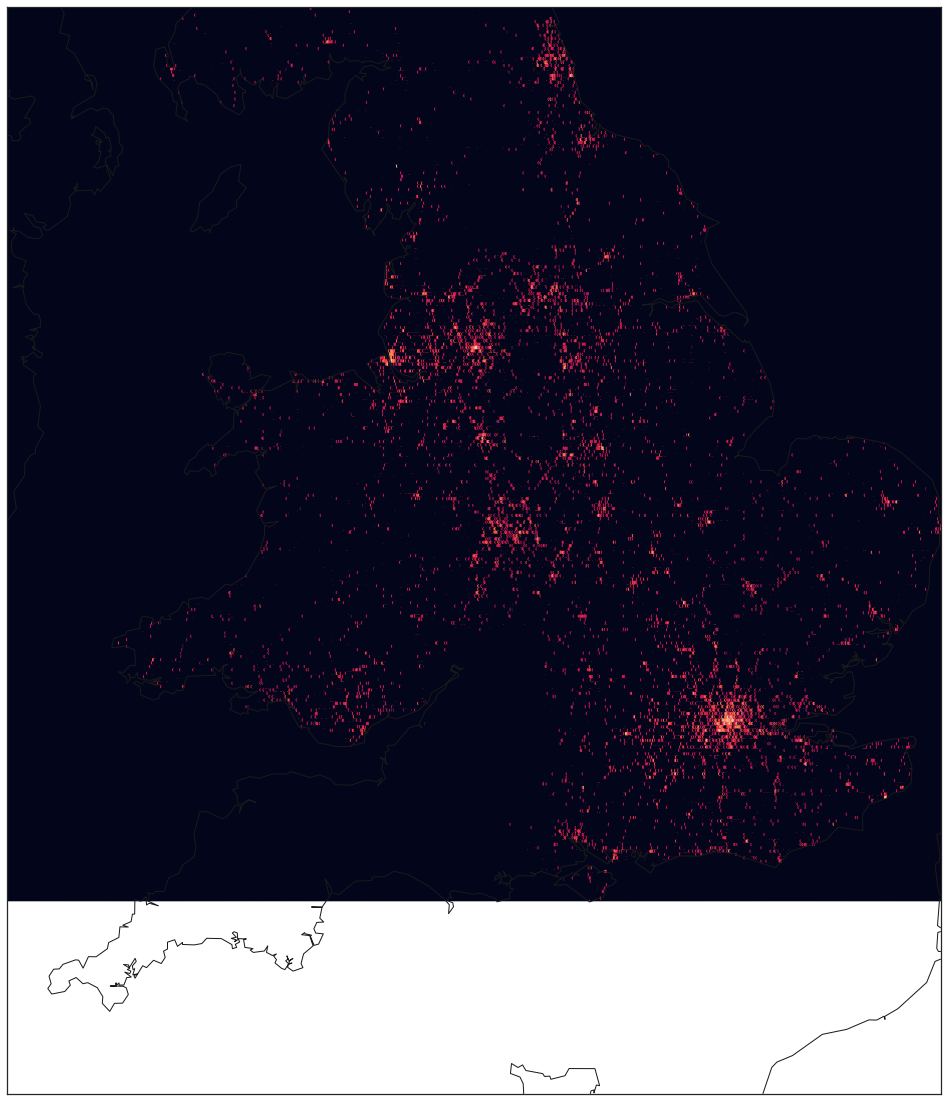

In [20]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
m = Basemap(lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2,resolution='i', 
            projection='tmerc', epsg=27700)
x, y = m(df2['Lon'].values, df2['Lat'].values)
m.hexbin(x, y, gridsize=1000,bins='log');
m.drawcoastlines()

plt.show()

In [21]:
# Distribution of data from specifically the year 2016. Use different color to distinguish different Regions

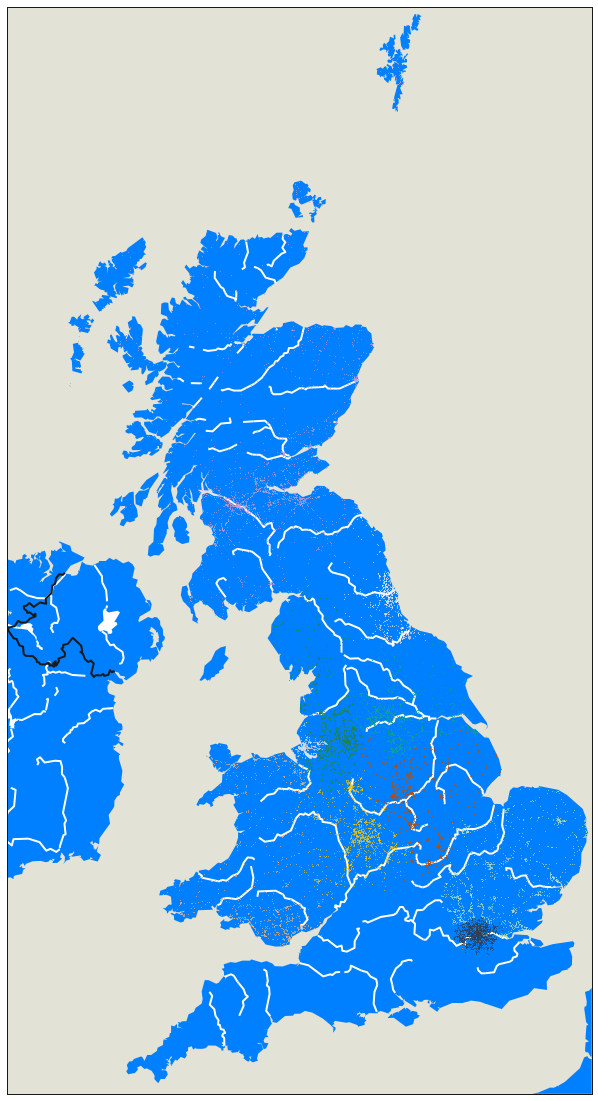

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='i',
            projection='tmerc',
            lon_0=-4.36,lat_0=54.7,
            epsg=27700)
m.drawmapboundary(fill_color='#e2e2d7')
m.fillcontinents(color='#007fff',lake_color='#ffffff') 
#m.drawcoastlines()
m.drawrivers(color = '#ffffff', linewidth=2)
m.drawcountries(linewidth=2)

df2['lat_lon'] = list(zip(df2.Easting, df2.Northing))
df2_2016 = df2[df2['AADFYear']==2016]

region_set = set(df2['Region']) 
colour_set = ['#f9ebea','#d5d8dc','#c39bd3','#BA4A00','#17A589','#1E8449','#e2df5d','#2E4053','#F1c40F','#A9DFBF','#F0B27A']
region_colour_dict = dict(zip(region_set, colour_set))

df2_2016 = df2_2016.reset_index()

for i, r in df2_2016.iterrows():
    x,y = r['lat_lon']
    m.plot(x, y, marker = 'o', c=region_colour_dict[r['Region']], markersize=1, alpha=0.8, latlon=False)

plt.show()

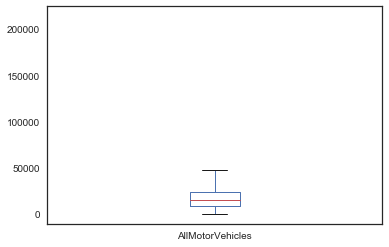

In [23]:
df2_2016['AllMotorVehicles'].plot(kind="box")

In [24]:
# What's the percentage of newly built properties?

In [25]:
total_new = df.new.sum()
percentage_new = total_new / len(df) * 100
print('Total new: {0}  | Percentage new: {1}'.format(total_new, percentage_new))

Total new: 121379  | Percentage new: 11.694897290630902


In [26]:
# Draw postcode boundaries on the map, first import post code file

In [27]:
postcodes = pd.read_csv('C:/Users/Young/Desktop/1210due/postcodes.csv', usecols=['Postcode', 'Latitude', 'Longitude'])
postcodes.columns = ['postcode', 'lat', 'lon']
postcodes.head()

,postcode,lat,lon
0,AB1 0AA,57.101478,-2.242852
1,AB1 0AB,57.102558,-2.246309
2,AB1 0AD,57.100560,-2.248342
3,AB1 0AE,57.084447,-2.255708
4,AB1 0AF,57.096659,-2.258103


In [28]:
# Merge two files

In [29]:
df = df.merge(postcodes, on='postcode')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,lat,lon
0,440000,2016-03-29 00:00,IG3 9ER,T,0,F,83,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A,51.550203,0.097056
1,440000,2016-01-29 00:00,IG3 9ER,S,0,F,57,NaN,ASHBURTON AVENUE,NaN,ILFORD,REDBRIDGE,GREATER LONDON,A,A,51.550203,0.097056
2,995000,2016-03-30 00:00,HA6 2RR,D,0,F,2,NaN,CHELWOOD CLOSE,NaN,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A,51.611481,-0.436451
3,355000,2016-03-23 00:00,TW14 9NR,D,0,F,46,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,B,A,51.452126,-0.418643
4,345000,2016-02-19 00:00,TW14 9NR,T,0,F,80,NaN,FRUEN ROAD,NaN,FELTHAM,HOUNSLOW,GREATER LONDON,A,A,51.452126,-0.418643


In [30]:
# Only focus on newly built properties and their loction in terms of region

In [31]:
new = df[df.new == 1]
new_areas = pd.DataFrame(new.groupby(new.postcode.str.extract(r'(\D+)')).postcode.count())
new_areas.columns = ['count']
new_areas.index.names = ['area']
new_areas = new_areas.reset_index()
new_areas.head(10)

C:\Users\Young\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,area,count
0,AL,339
1,B,2160
2,BA,1011
3,BB,522
4,BD,780
5,BH,882
6,BL,321
7,BN,1459
8,BR,426
9,BS,1892


In [32]:
# We need a location for these postcode areas to plot. 
# We will take the mean of all the points in each area to find an approximate location.

In [33]:
def get_by_area(area, df):
    result = df[(new.postcode.str.match('{}[^a-zA-Z].+'.format(area))) & (~new.lat.isnull()) & (~new.lon.isnull())]
    
    return result

def get_mean_area_lat_lon(area, df):
    area_houses = get_by_area(area, df) 
    mean_lat_lon = area_houses.lat.mean(), area_houses.lon.mean()
    
    return mean_lat_lon

new_areas['pos'] = new_areas.area.apply(get_mean_area_lat_lon, args=(new,))
new_areas.head()

,area,count,pos
0,AL,339,"(51.784361858407266, -0.2861475103244836)"
1,B,2160,"(52.45533521898133, -1.8889876949074054)"
2,BA,1011,"(51.21108377052408, -2.433367895153317)"
3,BB,522,"(53.795771745210835, -2.3437650268199257)"
4,BD,780,"(53.81999940384607, -1.8314138935897415)"


In [34]:
# Show these on the map, the size of points correlates to how many new houses are in that area.

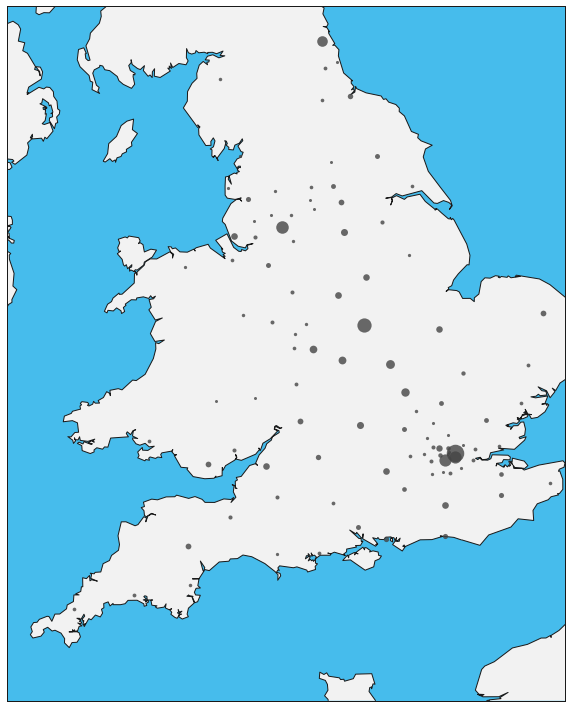

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='i', projection='tmerc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
    
def plot_area(pos):
    count = new_areas.loc[new_areas.pos == pos]['count']
    x, y = m(pos[1], pos[0])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
new_areas.pos.apply(plot_area)

m

In [36]:
# Draw postcode boundaries on the map and colour them depending on how many new houses in that area. 
# The darker the colour, the more new houses in the area.
# shapefile :http://www.ukpostcode.net/shapefile-of-uk-administrative-counties-wiki-16.html

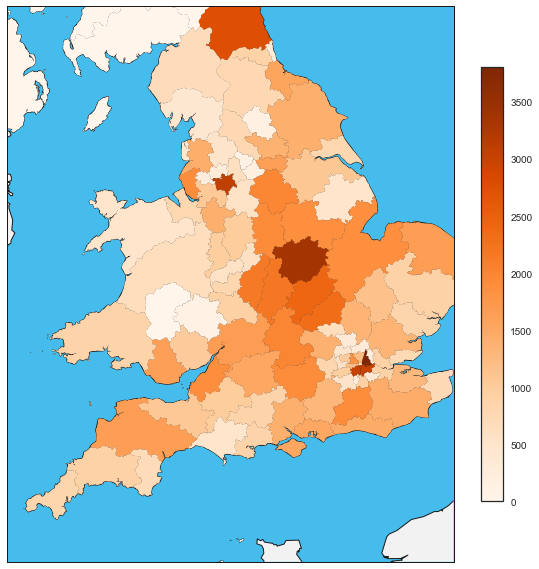

In [37]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.cm


fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='i', 
            projection='tmerc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2) 
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('../1210due/shppostcode/Distribution/Areas', 'areas')

df_poly = pd.DataFrame({'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['name'] for area in m.areas_info]})
df_poly = df_poly.merge(new_areas, on='area', how='left')

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['count'])
plt.colorbar(mapper, shrink=0.4)

m

In [38]:
# use the min and max values to determine the normalised size of the CarsTaxis population
#(ranging from 0 to 1, with 1 being the highest possible value).
#Then I multiply the marker size by the normalisex value and then we have markers relatively sized
#to reflect the popularity of CarsTaxis.

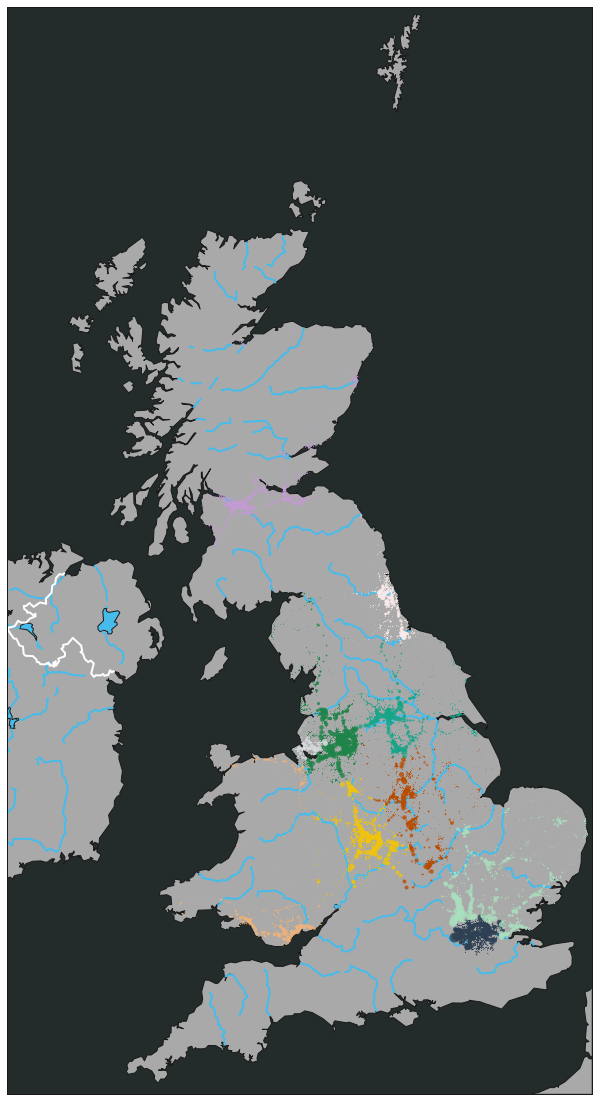

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='i',projection='tmerc',
            lon_0=-4.36,lat_0=54.7,epsg=27700)

m.drawmapboundary(fill_color='#232b2b') 
m.fillcontinents(color='#A9A9A9',lake_color='#46bcec') 
m.drawcoastlines()
m.drawrivers(linewidth=2, color='#46BCEC') 
m.drawcountries(linewidth=2, color='#ffffff')

df2['lat_lon'] = list(zip(df2.Easting, df2.Northing))
df2_2016 = df2[df2['AADFYear']==2016]

region_set = set(df2['Region']) 
colour_set = ['#f9ebea','#d5d8dc','#c39bd3','#BA4A00','#17A589','#1E8449','#e2df5d','#2E4053','#F1c40F','#A9DFBF','#F0B27A'] 
region_colour_dict = dict(zip(region_set, colour_set)) 

df2_2016 = df2_2016.reset_index()

min_CarsTaxis = min(df2_2016['CarsTaxis'])
max_CarsTaxis = max(df2_2016['CarsTaxis'])
denom = max_CarsTaxis - min_CarsTaxis

for i, r in df2_2016.iterrows(): 
    x,y = r['lat_lon']
    size = (r['CarsTaxis']-min_CarsTaxis)/denom
    m.plot(x, y, marker = 'o', c=region_colour_dict[r['Region']], markersize=10*size, alpha=0.8, latlon=False)

plt.show()